# fly_data object : defined in working_functions.py

Things to implement in it :
    -more metadata ?

method the object should have :
    -output the object seen by the fly at a given time based on all the other fly object in the "session" (or just given a number of fly objects)

In [1]:
    ### Necessary modules

#for plots
import matplotlib.pyplot as plt


# trajectorytools needs to be installed. To installed follow the instructions 
# at http://www.github.com/fjhheras/trajectorytools
from trajectorytools.constants import dir_of_data
import trajectorytools as tt
import trajectorytools.plot as ttplot
import trajectorytools.socialcontext as ttsocial
import copy
from scipy import stats
import numpy as np
import cv2
import skvideo.io
import imutils
import numpy.ma as ma


from matplotlib.axes import Axes as ax

#My functions
import working_functions as flyD
#import graphing_data #Not useful at the moment

#For importing files and timing cells.
import time
import matplotlib.mlab as mlab

Analysis function based on numerous fly_data objects from a single video :

    -position_summary: summarizes where we can find other flies relatively to our focus fly

    -A focus fly should be defined
    -Relative_fly object should be calculates based on the focus fly
    -What to calculate of this ?
    -Correlation between "turning" of the fly (derivation of orientation) and position of other flies ("global" position and specific position of every fly)

Landscape function ?:
    -Given a focus fly and a set of object, single-object projection of everything the fly sees ? 

Cell below doesn't need to be executed, is just here to write down data so it's possible to pick it up quickly afterward (get_ori takes ~6min to run)

In [2]:
flyD.save_ori_pickle("fly2")
flyD.save_ori_pickle("3flies")
flyD.save_ori_pickle("6flies_1")
flyD.save_ori_pickle("6flies_2")

/home/maubry/python/idtrackerai/working_functions.py:341: RuntimeWarning: divide by zero encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))
/home/maubry/python/idtrackerai/working_functions.py:341: RuntimeWarning: invalid value encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))


Orientations have been corrected and flipped 180 degrees.
Correlation is  -0.029283061834467886
orientations have been corrected only
Correlation is  0.8112037828108597
Orientations have been corrected and flipped 180 degrees.
Correlation is  -0.0243375791820615
Orientations have been corrected and flipped 180 degrees.
Correlation is  0.09429643638700523
Orientations have been corrected and flipped 180 degrees.
Correlation is  0.09150676207682727
time elapsed : 2.0min and 10sec
Orientations have been corrected and flipped 180 degrees.
Correlation is  0.031702826261115626
Orientations have been corrected and flipped 180 degrees.
Correlation is  0.0495636872983703
Orientations have been corrected and flipped 180 degrees.
Correlation is  0.08973116245967548
time elapsed : 6.0min and 55sec
Orientations have been corrected and flipped 180 degrees.
Correlation is  0.047144135639286815
orientations have been corrected only
Correlation is  0.35862561736518284
orientations have been corrected o

/home/maubry/python/idtrackerai/working_functions.py:101: RuntimeWarning: invalid value encountered in less
  
/home/maubry/python/idtrackerai/working_functions.py:104: RuntimeWarning: invalid value encountered in less
  self.ori_rel = ori_rel


[101.59165125 302.18469172 312.87777523 ... 312.96376369 311.51217858
 311.82943639]


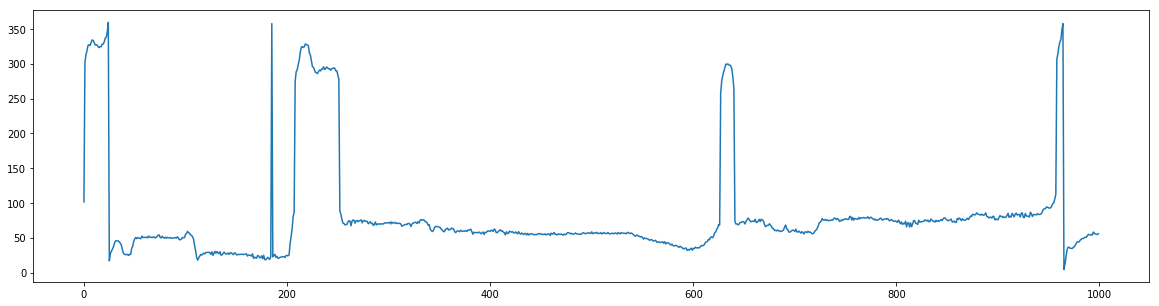

In [6]:
flystack = flyD.get_ori_pickle('6flies_1')

fly = flystack[1]
fly_correc = copy.deepcopy(fly)
#fly_correc.ori_correc(overwrite=True) #Now not necessary, as it is done by default.

fly2 = flystack[2]
fly2_correc = copy.deepcopy(fly2)
#fly2_correc.ori_correc(overwrite=True)
# #Get first fly and correct its orientations (correction now done by default)

rel = flyD.relative_fly(fly_correc, fly2_correc)
showrange = range(10000)

plt.figure(figsize=(20,5))
#plt.plot(fly_correc.orientations)
plt.plot(rel.angle[:1000])
print(rel.angle)

/home/maubry/python/idtrackerai/working_functions.py:114: RuntimeWarning: invalid value encountered in less
  angle[angle < 0] += 360
/home/maubry/python/idtrackerai/working_functions.py:117: RuntimeWarning: invalid value encountered in less
  ori_rel[ori_rel < 0] += 360


Video file saved as 6flies_2_ori.avi.


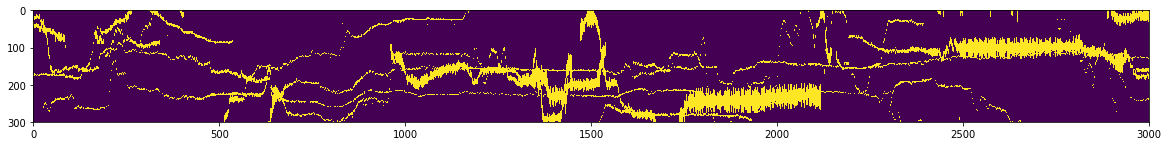

<Figure size 1440x360 with 0 Axes>

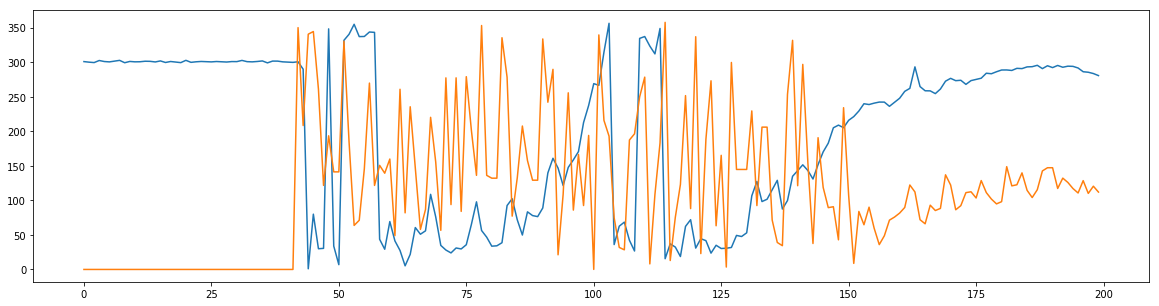

In [52]:
#Defining landscape function.
#For a specific fly, should output what the fly sees as stimilus for every frames.

    #Convert everything into a simple matrix of occupied pixels
    
stack = flyD.get_ori_pickle('6flies_1')

identity = 5
hue = flyD.landscape(stack, identity)

#fig, ax_meanposmap = plt.subplots(figsize=(200,20))
#ax_meanposmap.imshow(X=hue[:1000,])

time_range = range(3000)

hue_trans = np.transpose(hue)
fig, ax_meanposmap = plt.subplots(figsize=(20,200))
ax_meanposmap.imshow(X=hue_trans[...,time_range])
plt.figure(figsize=(20,5))

plt.figure(figsize=(20,5))
#plt.plot(fly_correc.orientations)
plt.plot(stack[identity].orientations[:200])
plt.plot(stack[identity].directions[:200])
flystack = copy.deepcopy(stack)

for fly in flystack:
    fly.orientations = fly.old_ori

#flyD.draw_ori("raw/6flies_1.avi", flystack,output_name=session+"_ori.avi", corrected = True)

#flyD.flyvision("huehue.avi", hue, 0, 500)


## Correlation between landscape and behaviour 

We want to find correlations between behaviour at time T (e.g. turning left) to previous landscape (e.g. last 30 frames).
How to avoid correlation betwee past behaviour and current behaviour ? 
    -Need moment when behaviour *begins* to avoid inertia effect.

/home/maubry/python/idtrackerai/working_functions.py:114: RuntimeWarning: invalid value encountered in less
  angle[angle < 0] += 360
/home/maubry/python/idtrackerai/working_functions.py:117: RuntimeWarning: invalid value encountered in less
  ori_rel[ori_rel < 0] += 360


Video file saved as draw_ori.avi.
0.7536418480849383


AttributeError: 'list' object has no attribute 'orientations'

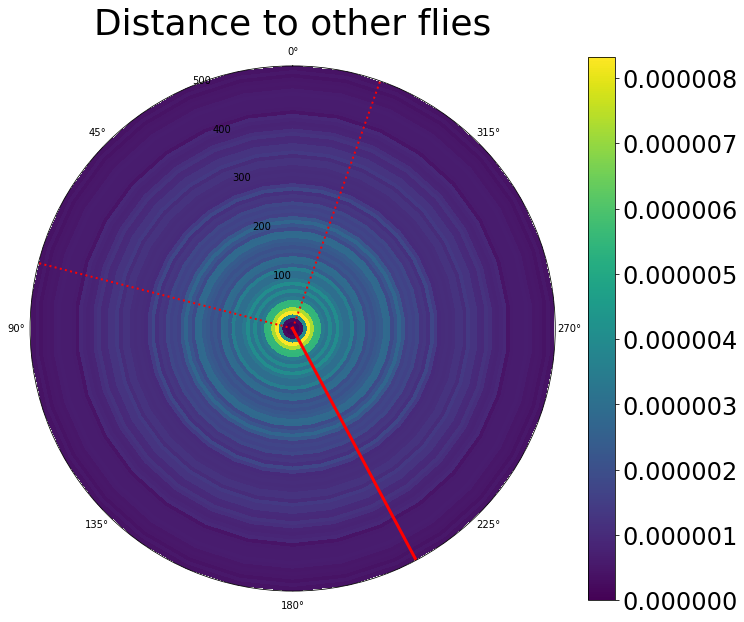

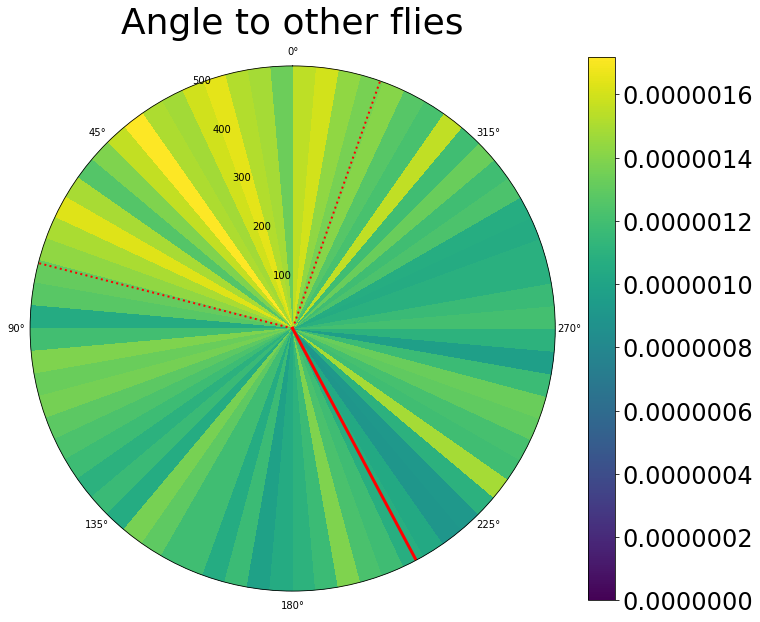

In [3]:
flystack = flyD.get_ori_pickle('6flies_1')

rel_flies = flyD.relative_set(flystack)

#flyD.draw_ori("raw/6flies_1.avi", flystack, corrected = True, limit=18000)



flyD.polar_histogram(rel_flies)
flyD.polar_histogram(rel_flies,distance=False)
# polar_histogram(get_ori_pickle('6flies_2'), force_bin=10)
# polar_histogram(get_ori_pickle('6flies_2'),distance=False, force_bin=50)


from scipy.stats import ks_2samp
print(stats.circmean(~np.isnan(rel_flies.orientations)))

stack = flyD.relative_set(flyD.get_ori_pickle('3flies'))
print(stats.circmean(rel_flies.orientations[~np.isnan(flystack.orientations)], high=360))

#Creating two uniform datasets of same statistical caracteristics as our angles and distances
rand_angles = np.random.uniform(0,360,1000)
rand_distances = np.random.uniform(30,800,1000)

#Testing to see if our angles and distances are randomly distributed or not
#print(ks_2samp(rand_angles, stack.orientations))
#print(ks_2samp(rand_distances, stack.dist))
#Our data are indeed not uniform.

In [25]:
# flyD.save_ori_pickle("fly2")
# sessions = ('fly2','3flies','6flies_1','6flies_2')

# for session in sessions:
#     flystack = flyD.get_ori_pickle(session)

#     flyD.draw_ori("raw/"+session+".avi", flystack,output_name=session+"_ori.avi", corrected = True)

#     for fly in flystack:
#         plt.figure(figsize=(20,3))
#         plt.ylim((-10,370))
#         plt.plot(fly.orientations[:500])


#     for fly in range(len(flystack)):
#         output = session+"_fly"+str(fly)+".avi"
#         flyscape = flyD.landscape(flystack, fly)
#         flyD.flyvision(output, flyscape,0,500)

Video file saved as fly2_ori.avi.


/home/maubry/python/idtrackerai/working_functions.py:114: RuntimeWarning: invalid value encountered in less
  angle[angle < 0] += 360
/home/maubry/python/idtrackerai/working_functions.py:117: RuntimeWarning: invalid value encountered in less
  ori_rel[ori_rel < 0] += 360


Video file saved as fly2_fly0.avi.
Video file saved as fly2_fly1.avi.
Video file saved as fly2_fly2.avi.
Video file saved as fly2_fly3.avi.
Video file saved as fly2_fly4.avi.
Video file saved as 3flies_ori.avi.
Video file saved as 3flies_fly0.avi.
Video file saved as 3flies_fly1.avi.
Video file saved as 3flies_fly2.avi.
Video file saved as 6flies_1_ori.avi.
Video file saved as 6flies_1_fly0.avi.
Video file saved as 6flies_1_fly1.avi.
Video file saved as 6flies_1_fly2.avi.
Video file saved as 6flies_1_fly3.avi.
Video file saved as 6flies_1_fly4.avi.
Video file saved as 6flies_1_fly5.avi.
Video file saved as 6flies_2_ori.avi.
Video file saved as 6flies_2_fly0.avi.


/home/maubry/python/idtrackerai/working_functions.py:337: RuntimeWarning: invalid value encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))
/home/maubry/python/idtrackerai/working_functions.py:371: RuntimeWarning: divide by zero encountered in double_scalars
  fly.size[i] = fly.size[i]*(projection_distance/fly.dist[i])
/home/maubry/python/idtrackerai/working_functions.py:371: RuntimeWarning: invalid value encountered in double_scalars
  fly.size[i] = fly.size[i]*(projection_distance/fly.dist[i])


Video file saved as 6flies_2_fly1.avi.
Video file saved as 6flies_2_fly2.avi.
Video file saved as 6flies_2_fly3.avi.
Video file saved as 6flies_2_fly4.avi.
Video file saved as 6flies_2_fly5.avi.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal
/usr/lib/python3/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal


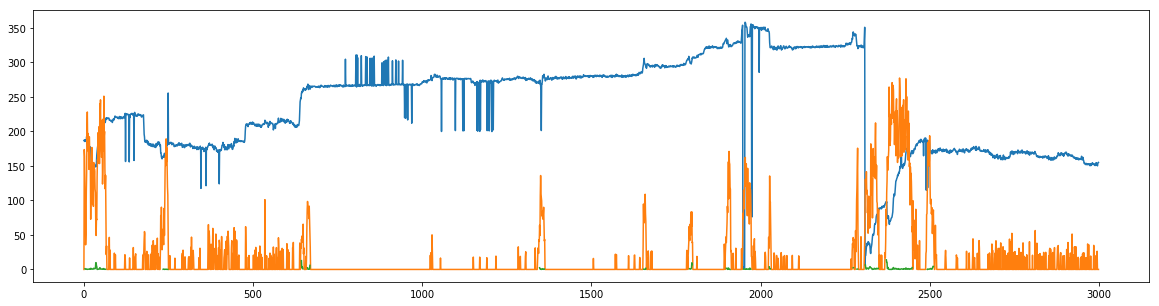

In [11]:
#Calculate moving average and variance for every point :

def rolling_stats_ori(fly, window_size):
    
    mean = np.zeros(shape=(len(fly.orientations)))
    var = np.zeros(shape=(len(fly.orientations)))
    dir_mean = np.zeros(shape=(len(fly.orientations)))
    dir_var = np.zeros(shape=(len(fly.orientations)))
    x =  window_size #half the size of the window    
    for i in range(len(fly.orientations)):
        ori_chunk = fly.orientations[int(i-x):int(i+x)]
        dir_chunk = fly.directions[int(i-x):int(i+x)]
        
        mean[i] = np.degrees(stats.circmean(np.radians(ori_chunk)))
        var[i] = np.degrees(stats.circvar(np.radians(ori_chunk)))
        dir_var[i] = np.degrees(stats.circvar(np.radians(dir_chunk)))
        dir_mean[i] = np.degrees(stats.circmean(np.radians(dir_chunk)))

    return dir_var, dir_mean

#Search for fly that begin turning



#Get the landscape of those fly just before they turned



flystack = flyD.get_ori_pickle('6flies_1')

focus = flystack[3]

var, mean = rolling_stats_ori(focus, 2)
var2, mean2 = rolling_stats_ori(focus, 5)
var = var
valid = np.zeros_like(var)
#valid[:] = np.nan
valid[var <= 10] = 1
valid[var <= 1] = 0


rolling_mean = np.zeros_like(valid)
x =  10 #half the size of the window

time_range = range(3000)
plt.figure(figsize=(20,5))
#plt.plot(fly_correc.orientations)
#plt.plot(focus.old_ori[8000:9000])
#plt.plot(focus.directions[time_range])
plt.plot(focus.orientations[time_range])
#plt.plot(focus.orientations[time_range])
plt.plot(focus.speeds[time_range])
plt.plot(var[time_range])

#print(var[time_range])
      
#print(focus.orientations[17300]-focus.old_ori[17300])

In [30]:
path_to_vid = "raw/6flies_1.avi"

flystack = flyD.get_ori_pickle('6flies_1')
focus = flystack[3]

thresh=110

cap = cv2.VideoCapture(path_to_vid)
framerate=30
fps=str(framerate)
inputdict={'-r': fps}
outputdict={'-vcodec': 'libx264', '-pix_fmt': 'yuv420p', '-r': fps}
font = cv2.FONT_HERSHEY_SIMPLEX
output_name = "solofly2.avi"
writer = skvideo.io.FFmpegWriter(output_name, inputdict, outputdict)

p = 40

for i in range(2250):
    ret, img = cap.read()
    
for i in range(500):
    center = focus.positions[int(i+2250)]
    center = center.astype('int')

    angle = np.radians(focus.directions[int(i+2250)])
    
    
    newx = center[0]+(np.cos(angle)*20) #Get distance forward in x
    newy = center[1]+(np.sin(angle)*20) #Get distance forward in y
            
    center_plus = (int(newx),int(newy)) #Second point of vector
            
    center = tuple(center) #Conversion to please cv2
    center_plus = tuple(center_plus)
    
    
    ret, img = cap.read()
    
    cv2.arrowedLine(img, center, center_plus, (255,255,255)) #Draw line

    
    crop_img = img[int(center[1]-p):int(center[1]+p), 
                   int(center[0]-p):int(center[0]+p)]
    
    writer.writeFrame(crop_img)
    
writer.close() 